In [112]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob
import pandas as pd
from scipy.optimize import curve_fit

In [136]:
# matplotlib config
from cycler import cycler
from matplotlib.ticker import MultipleLocator

cmap = plt.cm.Blues
c = cycler('color', ['#0f4b71', '#427296', '#709cb3', '#a5c7c8', '#f2eed1'])
plt.rcParams['axes.prop_cycle'] = c
plt.rcParams.update({'font.size': 18})
#plt.rcParams['text.usetex'] = True
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 5.0
plt.rcParams['xtick.minor.size'] = 3.0
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
ax.xaxis.set_minor_locator(MultipleLocator(.5))
ax.yaxis.set_minor_locator(MultipleLocator(.005))
# plt.rcParams.update(plt.rcParamsDefault)

# Time series of run

In [114]:
def load_time_series_data(path):
    data_file = h5py.File(path + '/time.h5', 'r')
    ts = data_file['series']
    values = [ts[:,i] for i in range(9)]
    columns = ['iterations', 'time', 'T_min', 'T_mean', 'T_max', 'v_rms', 'v_x_rms', 'Nu_bot', 'Nu_top']
    df = pd.DataFrame.from_dict(dict(zip(columns, values)))
    return df

In [120]:
Ra = [1e3, 3e3, 1e4, 3e4, 1e5, 3e5, 1e6, 3e6]

data_path = 'Runs/No_heating_const_visco/'
ts1e3 = load_time_series_data(data_path + 'Ra_1e3')
ts3e3 = load_time_series_data(data_path + 'Ra_3e3')
ts1e4 = load_time_series_data(data_path + 'Ra_1e4')
ts3e4 = load_time_series_data(data_path + 'Ra_3e4')
ts1e5 = load_time_series_data(data_path + 'Ra_1e5')
ts3e5 = load_time_series_data(data_path + 'Ra_3e5')
ts1e6 = load_time_series_data(data_path + 'Ra_1e6')
ts3e6 = load_time_series_data(data_path + 'Ra_3e6')

In [5]:
def plot_Nu(ts, save=False):
    iterations = ts['iterations']
    Nu_bot = ts['Nu_bot']
    Nu_top = ts['Nu_top']
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(iterations, Nu_bot, label='$Nu$ bot')
    ax.plot(iterations, Nu_top, label='$Nu$ top')
    ax.legend()
    ax.set_xlabel('Iteration')
    if save:
        fig.savefig('Ola.pdf')
    plt.show()

In [ ]:
def time_average(magnitude, it_0):
    mean = np.mean(magnitude[it_0:])
    std = np.std(magnitude[it_0:])
    return mean, std

In [117]:
def plot_v(ts, save=False):
    iterations = ts['iterations']
    v = ts['v_rms']
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(iterations, v)
    ax.set_xlabel('Iteration')
    ax.set_ylabel('$v$')
    if save:
        fig.savefig('Ola.pdf')
    plt.show()

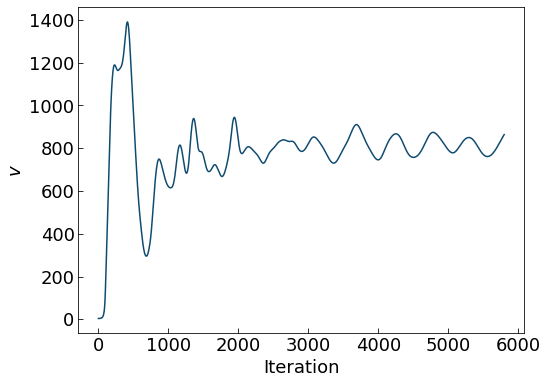

In [137]:
plot_v(ts1e6)

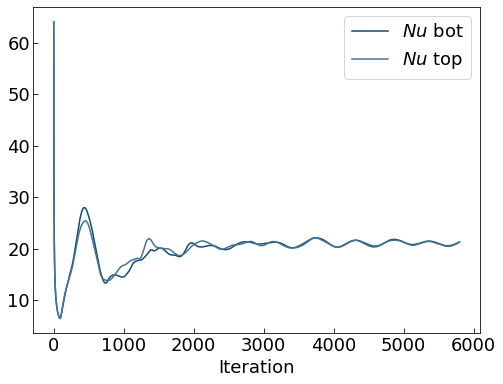

In [138]:
plot_Nu(ts1e6)

### Graphing Velocity vs Rayleigh Number

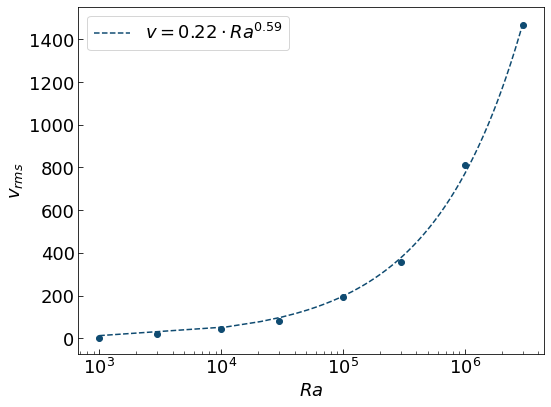

In [139]:
Ra = [1e3, 3e3, 1e4, 3e4, 1e5, 3e5, 1e6, 3e6]

v_rms = [time_average(ts1e3['v_rms'],2000)[0],time_average(ts3e3['v_rms'],2000)[0],time_average(ts1e4['v_rms'],2000)[0],
     time_average(ts3e4['v_rms'],2000)[0],time_average(ts1e5['v_rms'],2000)[0], time_average(ts3e5['v_rms'],2000)[0],
     time_average(ts1e6['v_rms'],4000)[0], time_average(ts3e6['v_rms'], 3000)[0]]

v_rms_err = [time_average(ts1e3['v_rms'],2000)[1],time_average(ts3e3['v_rms'],2000)[1],time_average(ts1e4['v_rms'],2000)[1],
     time_average(ts3e4['v_rms'],2000)[1],time_average(ts1e5['v_rms'],2000)[1], 
     time_average(ts1e6['v_rms'],4000)[1], time_average(ts3e6['v_rms'], 3000)[1]]

def f(x, a, b):
    return a*x**b

popt, pcov = curve_fit(f, Ra, v_rms)
xx = np.linspace(min(Ra), max(Ra), 300)

#figure
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(Ra, v_rms)
ax.plot(xx, f(xx, *popt), ls = '--', label=r'$v = {:.2f} \cdot Ra^{{{:.2f}}}$'.format(popt[0], popt[1]))
ax.set_xlabel('$Ra$')
ax.set_ylabel('$v_{rms}$')
ax.set_xscale("log")
ax.legend()
fig.tight_layout()
#fig.savefig('Figures/v_Ra.pdf')
plt.show()

### Nuselt number vs Raileigh number

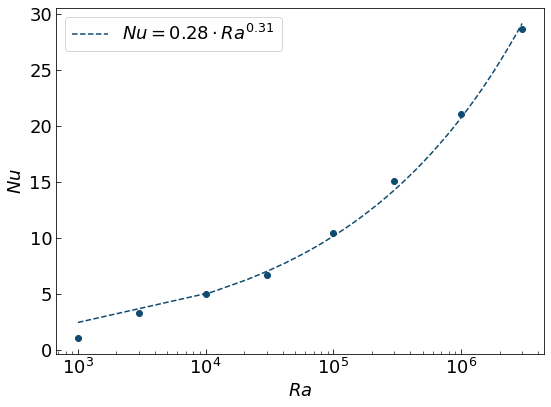

In [140]:
Nu_top = [time_average(ts1e3['Nu_top'],2000)[0],time_average(ts3e3['Nu_top'],2000)[0],time_average(ts1e4['Nu_top'],2000)[0],
     time_average(ts3e4['Nu_top'],2000)[0],time_average(ts1e5['Nu_top'],2000)[0], time_average(ts3e5['Nu_top'],2000)[0],
    time_average(ts1e6['Nu_top'],4000)[0], time_average(ts3e6['Nu_top'],2000)[0]]

Nu_bot = [time_average(ts1e3['Nu_bot'],2000)[0],time_average(ts3e3['Nu_bot'],2000)[0],time_average(ts1e4['Nu_bot'],2000)[0],
     time_average(ts3e4['Nu_bot'],2000)[0],time_average(ts1e5['Nu_bot'],2000)[0], time_average(ts3e5['Nu_bot'],2000)[0],
    time_average(ts1e6['Nu_bot'],4000)[0], time_average(ts3e6['Nu_bot'],2000)[0]]

popt, pcov = curve_fit(f, Ra, Nu_bot)

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(Ra, Nu_bot)
ax.plot(xx, f(xx, *popt), ls = '--', label=r'$Nu = {:.2f} \cdot Ra^{{{:.2f}}}$'.format(popt[0], popt[1]))
ax.set_xlabel('$Ra$')
ax.set_ylabel('$Nu$')
ax.set_xscale('log')
ax.legend()
fig.tight_layout()
# fig.savefig('Figures/Nu_Ra.pdf')
plt.show()

# Snapshots 

In [105]:
data_path = 'Runs/No_heating_const_visco/Ra_1e6'
snapshot_list = glob.glob(data_path + '/*.npz')
snapshot_list.sort()
print('Number of snapshots in run:', len(snapshot_list))
snapshot = 20
temp, vx, vz, v, p = read_snapshot(snapshot)

Number of snapshots in run: 30


In [106]:
def read_snapshot(snapshot):
    snapshot_data = np.load(snapshot_list[snapshot])
    temp = snapshot_data['T']
    vx = snapshot_data['vx']
    vz = snapshot_data['vz']
    v = (vx**2+vz**2)**0.5
    p = snapshot_data['p']
    return temp, vx, vz, v, p

In [107]:
def plot_2d_field(temp, vx, vz, v, stream=True, save=False):
    nx, nz = np.shape(temp)
    x = np.linspace(0, nx/nz, nx)
    z = np.linspace(0,1, nz)
    x, z = np.meshgrid(x, z)
    fig, ax = plt.subplots(figsize=(16,8))
    plot = ax.pcolormesh(x, z, temp.T, cmap='RdBu_r')
    cbar = plt.colorbar(plot, shrink=0.6, orientation='horizontal')
    plt.axis('equal')
    ax.set_adjustable('box')
    ax.set_xlim(0, nx/nz)
    ax.set_ylim(0,1)
    fig.tight_layout()
    cbar.set_label('Temperature')
    if stream:
        lw = 3*v/v.max()
        ax.streamplot(x, z, vx.T, vz.T, density=0.8, linewidth=lw.T, color='k')
    if save:
        fig.savefig(data_path + f'/Analysis/field_{snapshot}.pdf')
    plt.show()


In [108]:
def vertical_temp_profile(temp, save=False):
    temp_z = np.mean(temp, 0)
    z = np.linspace(0,1,np.size(temp_z))
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(temp_z, z)
    ax.set_xlabel('Temperature')
    ax.set_ylabel('z')
    fig.tight_layout()
    if save:
        fig.savefig(data_path + f'Analysis/vert_temp.pdf')
    plt.show()

In [ ]:
plot_2d_field(temp, vx, vz, v, stream=True, save=True)

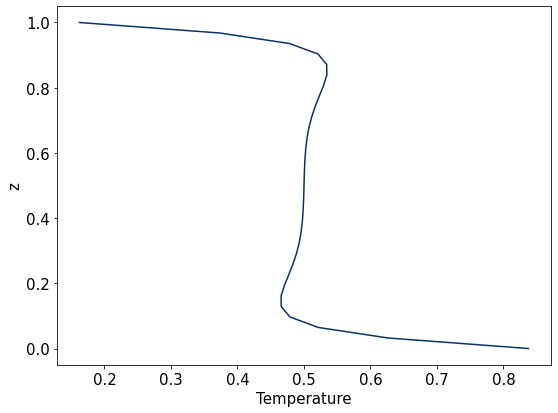

In [321]:
vertical_temp_profile(temp)